# Assignment 10: SUPPORT VECTOR MACHINE

Task 1: Exploratory Data Analysis (EDA)

1.	Load the dataset and perform fundamental data exploration.

2.	Utilize histograms, box plots, or density plots to understand feature distributions.
  
3.	Investigate feature correlations to discern relationships within the data.

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv("Pharma_Industry.csv")
df

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1
...,...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0


In [36]:
df.isnull().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [37]:
df.describe

<bound method NDFrame.describe of      Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
0           -0.128538                        0.303280         -1.881849   
1           -1.846188                        2.865142         -0.929511   
2           -1.252393                       -1.541613          0.363632   
3            1.992515                       -1.142779         -0.766657   
4            0.377100                        0.538410         -0.029263   
..                ...                             ...               ...   
495         -1.553759                        0.506938          0.817890   
496          0.551476                        1.714321          0.340589   
497         -1.072743                       -0.221137          0.239247   
498          1.661259                        0.245759         -0.457096   
499         -1.143726                        0.715320          0.108560   

     Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL)  Dru

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [39]:
num_col = df.columns

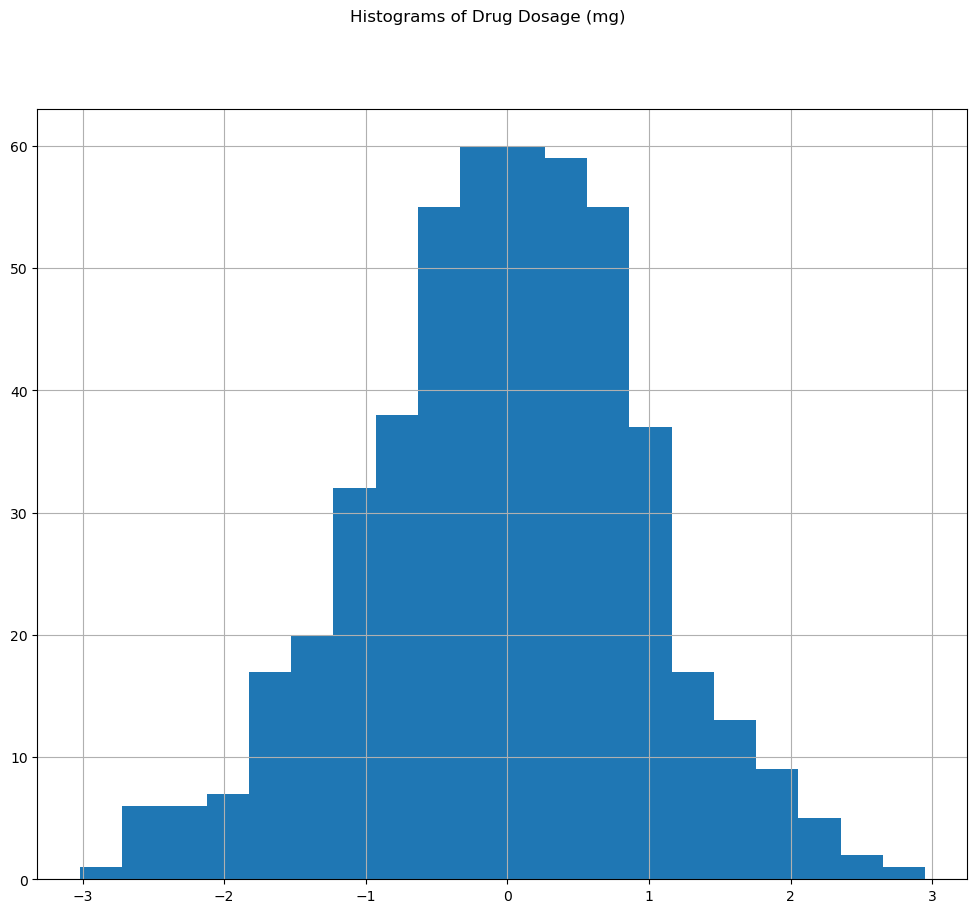

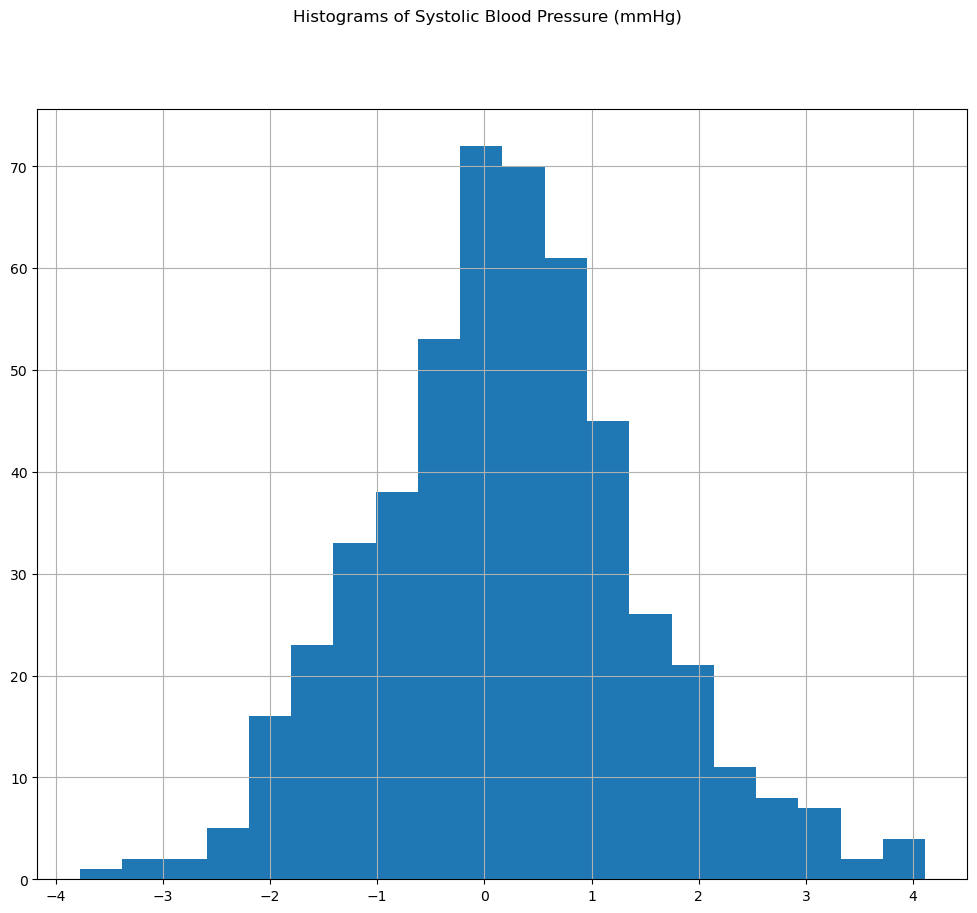

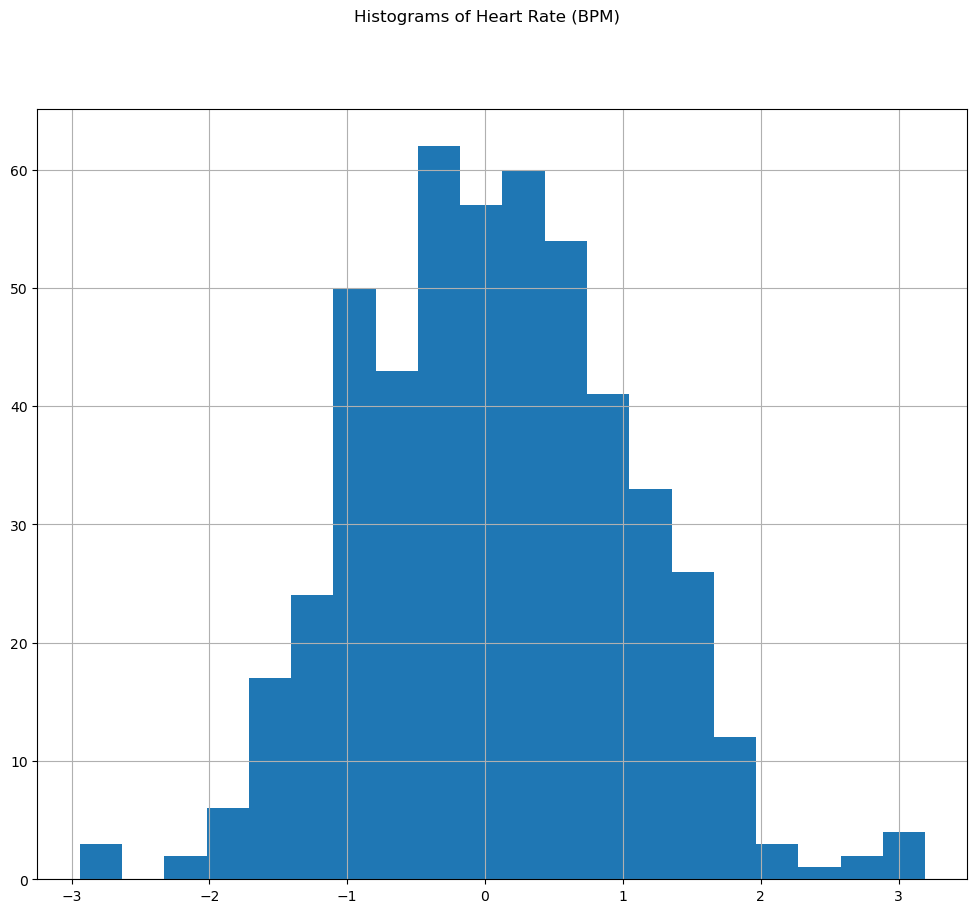

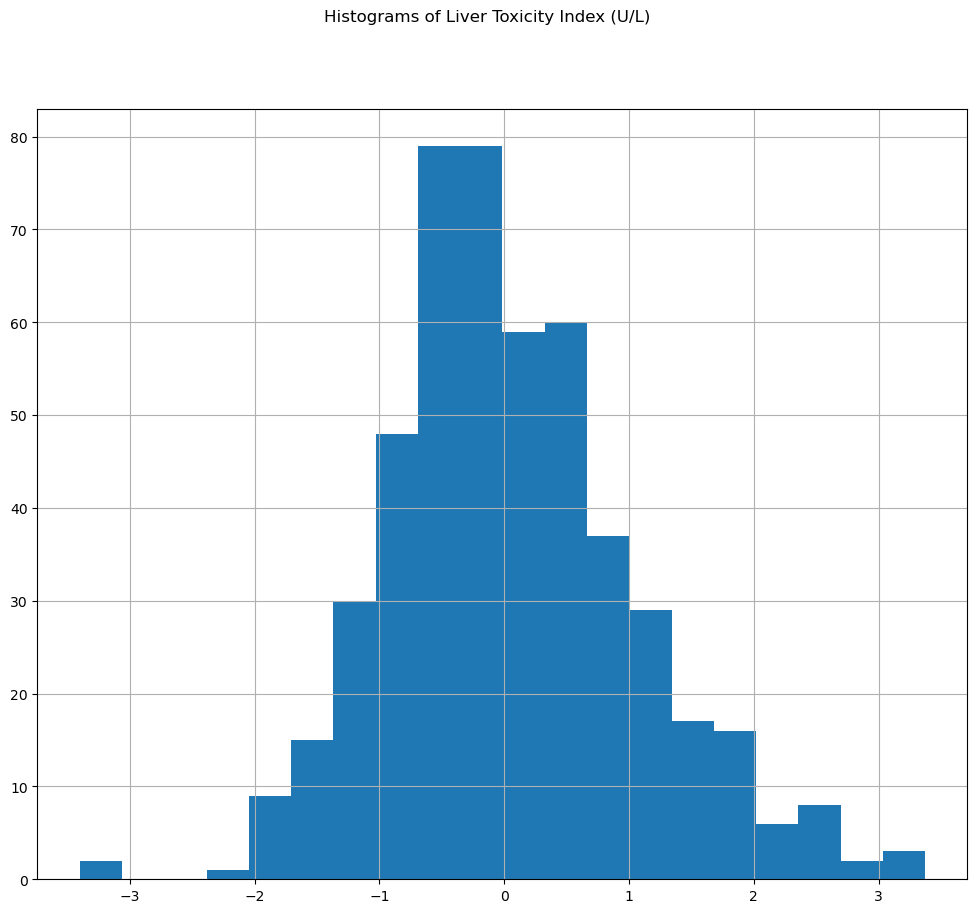

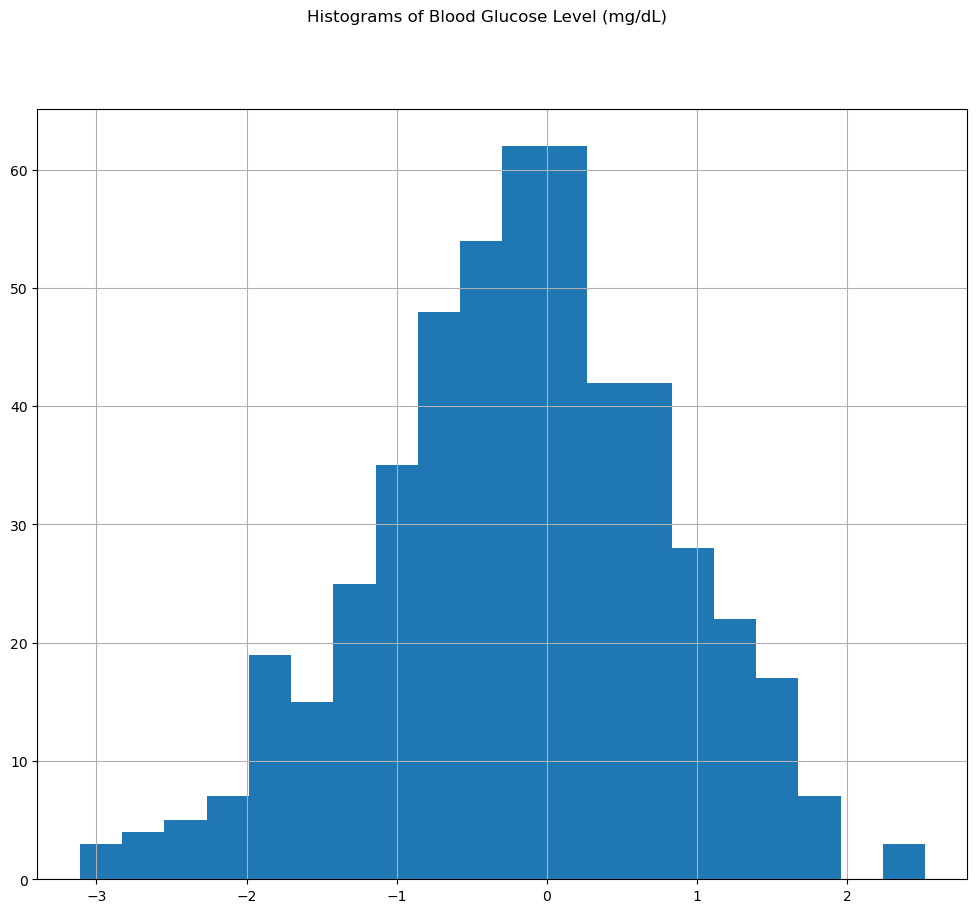

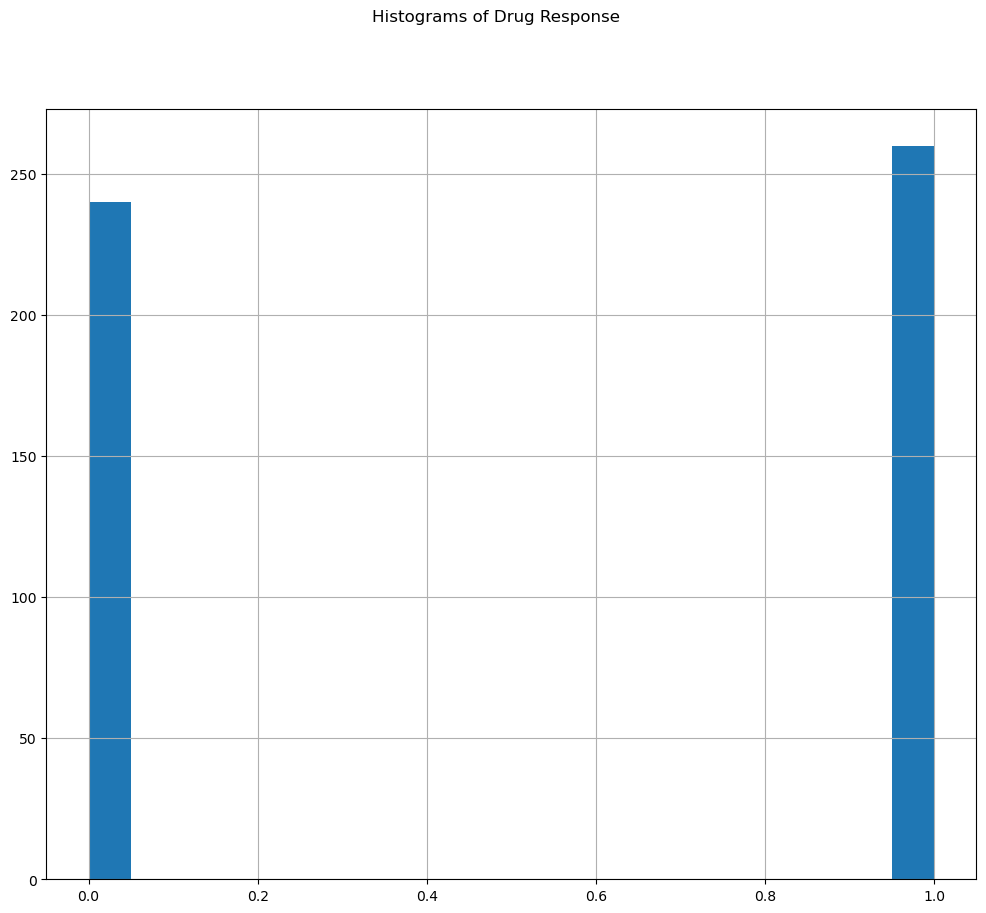

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_col:
    df[col].hist(figsize=(12, 10), bins=20)
    plt.suptitle(f"Histograms of {col}")
    plt.show()

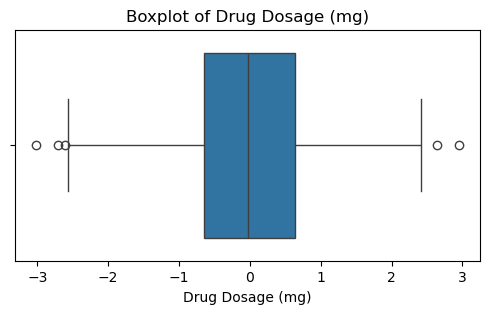

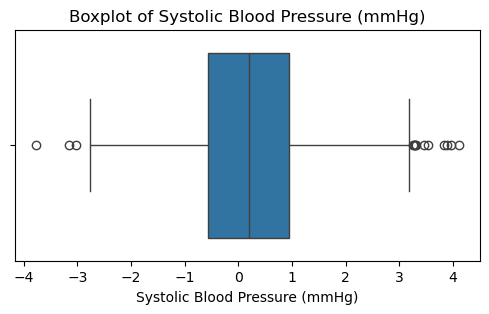

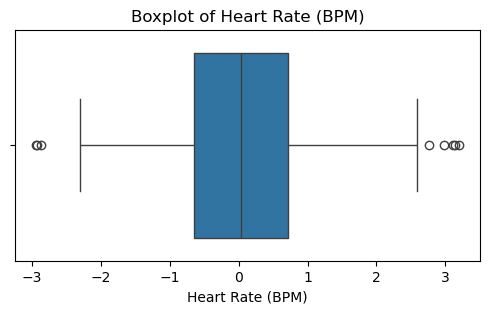

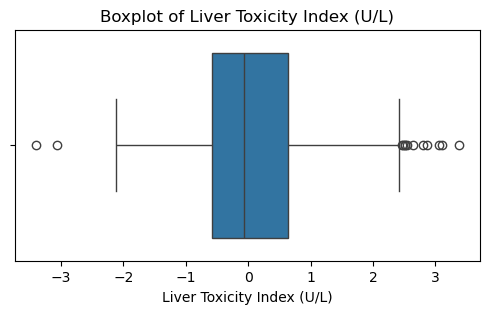

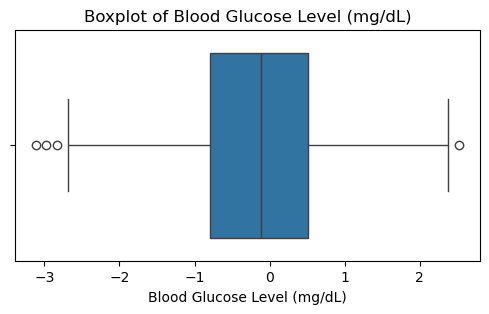

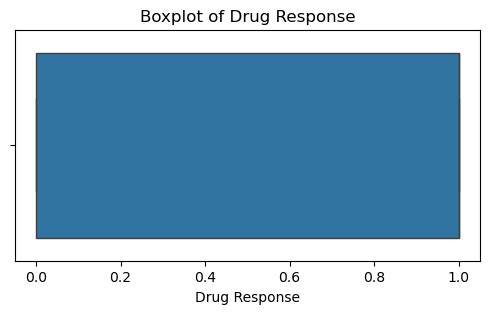

In [41]:
# Box Plot

for col in num_col:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

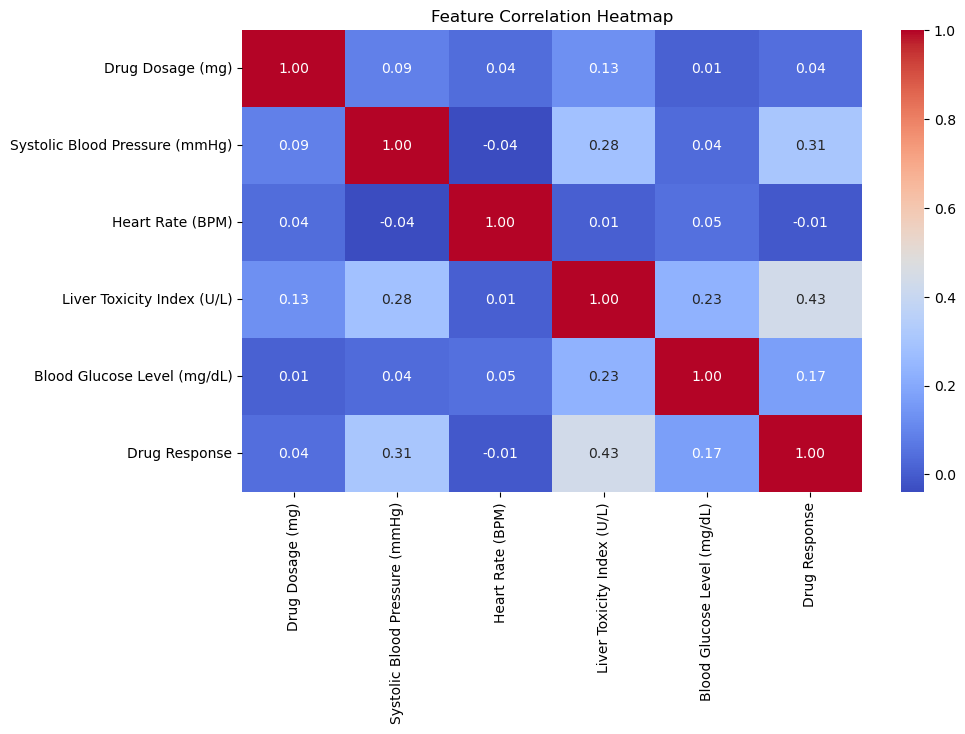

In [42]:
num_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Task 2: Data Preprocessing

1.	Encode categorical variables if necessary.

2.	Split the dataset into training and testing sets.


In [43]:
# Convert to DataFrame for reference
X = df.iloc[:,0:3]
y = df["Drug Response"]

In [44]:
#Split the dataset into training and testing sets.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


Task 3: Data Visualization

1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

2.	Visualize class distributions to gauge dataset balance or imbalance.


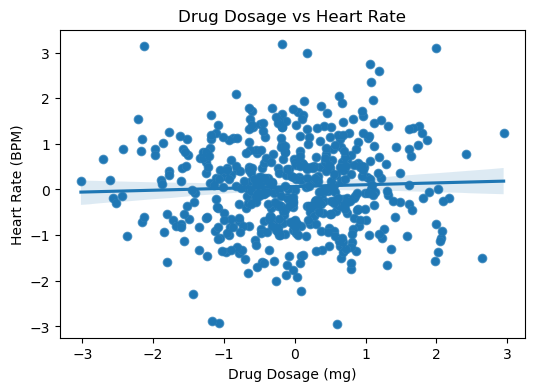

In [45]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = df['Drug Dosage (mg)'], y = df['Heart Rate (BPM)'])
sns.regplot(
    x=df['Drug Dosage (mg)'],
    y=df['Heart Rate (BPM)'],
    scatter_kws={'alpha':0.7},
)
plt.title("Drug Dosage vs Heart Rate")
plt.xlabel("Drug Dosage (mg)")
plt.ylabel("Heart Rate (BPM)")
plt.show()

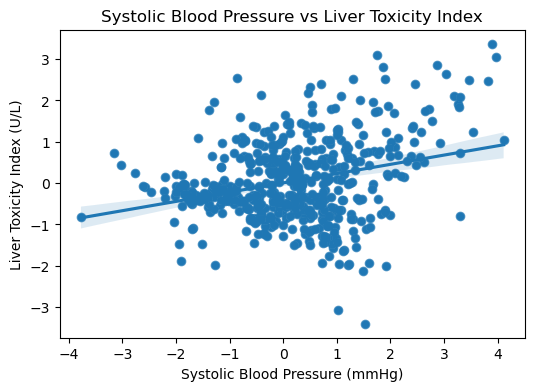

In [46]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = df['Systolic Blood Pressure (mmHg)'], y = df['Liver Toxicity Index (U/L)'])
sns.regplot(
    x=df['Systolic Blood Pressure (mmHg)'],
    y=df['Liver Toxicity Index (U/L)'],
    scatter_kws={'alpha':0.7},
)
plt.title("Systolic Blood Pressure vs Liver Toxicity Index")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Liver Toxicity Index (U/L)")
plt.show()

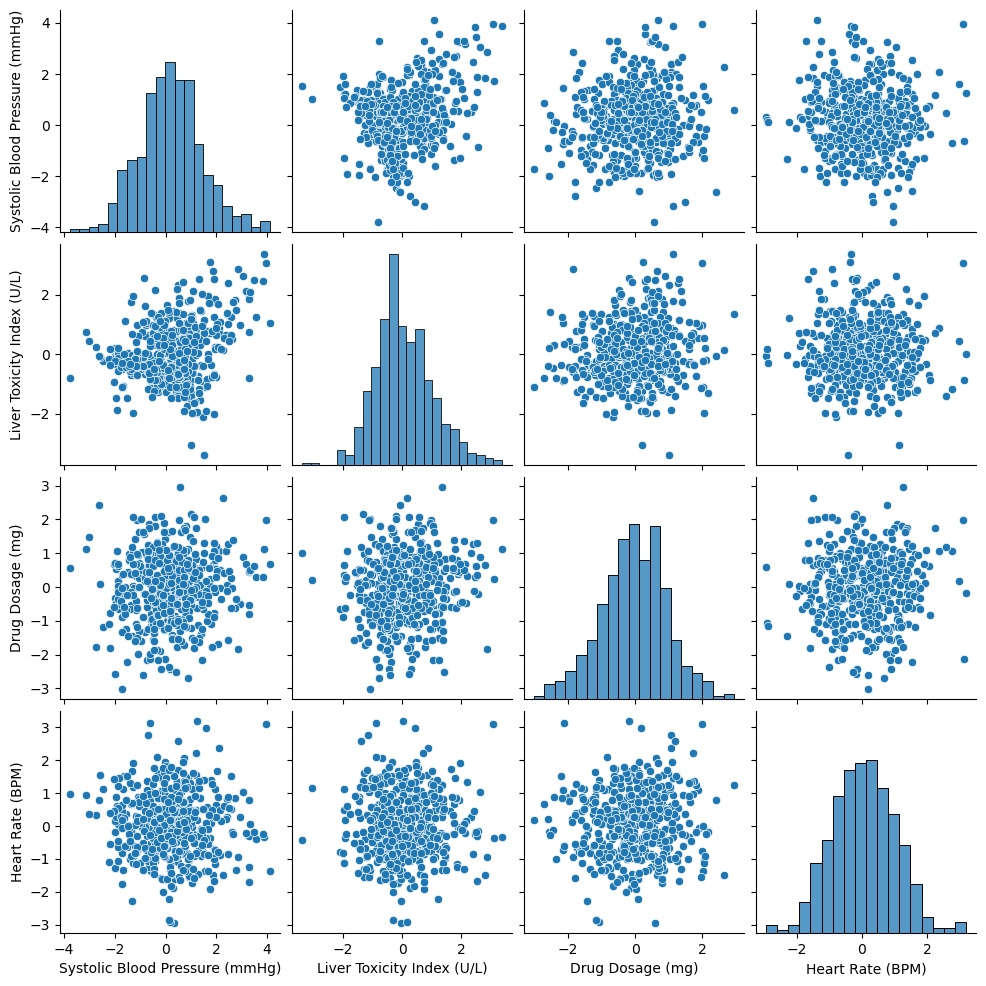

In [47]:
cols = ['Systolic Blood Pressure (mmHg)', 'Liver Toxicity Index (U/L)', 'Drug Dosage (mg)','Heart Rate (BPM)']
sns.pairplot(df[cols])
plt.show()

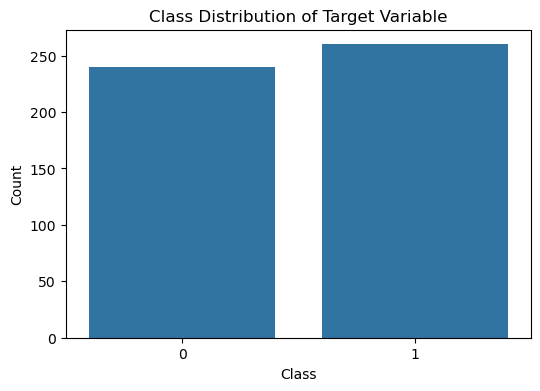

In [48]:
#2.	Visualize class distributions to gauge dataset balance or imbalance.
target_col = 'Drug Response'

plt.figure(figsize=(6,4))
sns.countplot(x = df[target_col])
plt.title("Class Distribution of Target Variable")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [49]:
 print(df[target_col].value_counts())

Drug Response
1    260
0    240
Name: count, dtype: int64


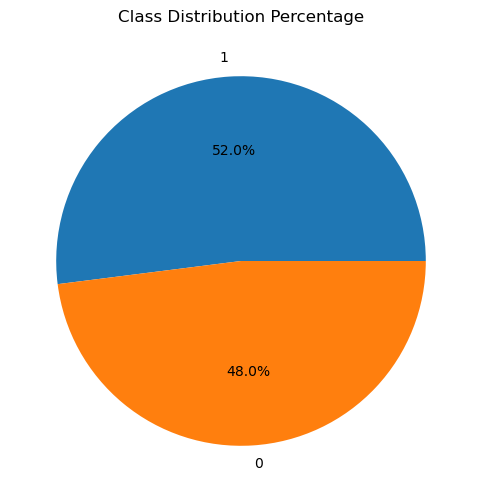

In [51]:
df[target_col].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6)
)
plt.title("Class Distribution Percentage")
plt.ylabel("")
plt.show()

Task 4: SVM Implementation

1.	Implement a basic SVM classifier using Python libraries like scikit-learn.

2.	Train the SVM model on the training data.

  
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [53]:
X = df.drop(columns=['Drug Response'])
y = df['Drug Response']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [57]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# 2.Train the SVM model on the training data.
svm_model = SVC(kernel = 'rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [59]:
y_pred = svm_model.predict(X_test_scaled)

3) Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [61]:
# Accuracy
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:', round(accuracy, 2))

Accuracy: 0.77


In [62]:
#Precision
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', round(precision, 2))

Precision: 0.77


In [63]:
#Recall
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', round(precision, 2))

Recall: 0.77


In [64]:
#Precision
f1 = f1_score(y_test, y_pred, average='weighted')
print('f1:', round(precision, 2))

f1: 0.77


Task 5: Visualization of SVM Results

1.	Visualize classification results on the testing data.


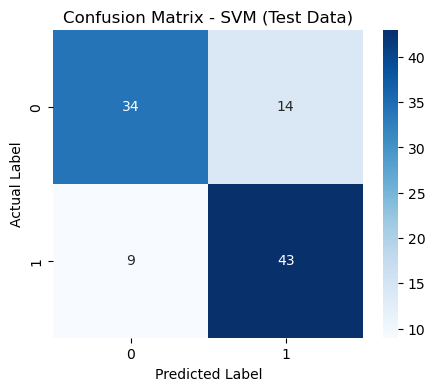

In [66]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM (Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

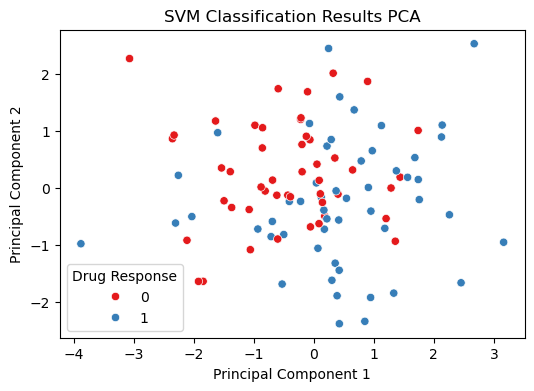

In [67]:
#PCA & Scatter Plot
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test_pca[:,0], y= X_test_pca[:,1], hue= y_test, palette='Set1')
plt.title('SVM Classification Results PCA')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Task 6: Parameter Tuning and Optimization

1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [68]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {'kernel': ['linear', 'rdf', 'poly'],
             'C': [0.1,1,10,100],
             'gamma':['scale',0.01,0.1,1]
             }

In [72]:
grid_search = GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=5,scoring='f1_weighted',n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\lenovo\anaconda3\Lib\site-pack

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 0.01, ...], 'kernel': ['linear', 'rdf', ...]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [73]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", round(grid_search.best_score_, 2))

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Score: 0.72


Task 7: Comparison and Analysis

1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

2.	Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.


3.	Discuss practical implications of SVM in real-world classification tasks.


In [75]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        48
           1       0.75      0.83      0.79        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



In [76]:
kernels = ['linear', 'poly', 'rbf']
results = []

for k in kernels:
    svm = SVC(kernel=k, C=1, gamma='scale', random_state=42)
    svm.fit(X_train_scaled, y_train)
    
    y_pred_k = svm.predict(X_test_scaled)
    
    results.append({
        'Kernel': k,
        'Accuracy': accuracy_score(y_test, y_pred_k),
        'F1-score': f1_score(y_test, y_pred_k, average='weighted')
    })

results_df = pd.DataFrame(results)
print(results_df)

   Kernel  Accuracy  F1-score
0  linear      0.72  0.719664
1    poly      0.65  0.650105
2     rbf      0.77  0.768957


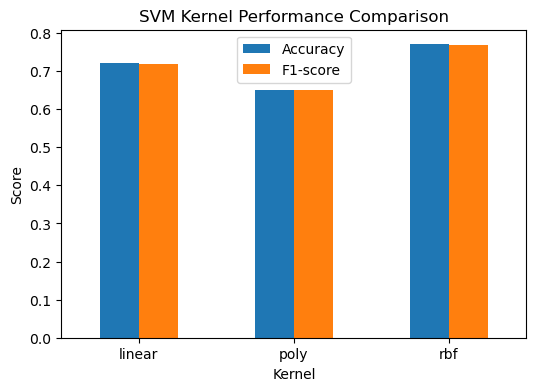

In [78]:
results_df.set_index('Kernel')[['Accuracy', 'F1-score']].plot(kind='bar', figsize=(6,4))
plt.title("SVM Kernel Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

# 2.	Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.

Ans:

Strengths:

- Performs well on numerical, scaled features

- Handles high-dimensional data effectively

- RBF kernel captures non-linear relationships seen in scatter plots & PCA

- Robust to overfitting with proper regularization

Weaknesses:

- Sensitive to hyperparameter tuning

- Computationally expensive for large datasets

- Hard to interpret compared to decision trees or logistic regression

- Kernel choice significantly impacts performance

# --------------------------------------------------------------------------

# 3) Practical Implications of SVM in Real-World Classification

 Where SVM Works Best:

1) Medical diagnosis

2) Fraud detection

3) Text & document classification

4) Bioinformatics data

   
Considerations Before Deployment:

- Requires feature scaling

- Not ideal for very large datasets

- Kernel selection must match data complexity

- Limited interpretability in high-stakes decisions